<a href="https://colab.research.google.com/github/agonzalezsal/Programaci-n-Orientada-a-Objetos-en-Python/blob/master/spc09032024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

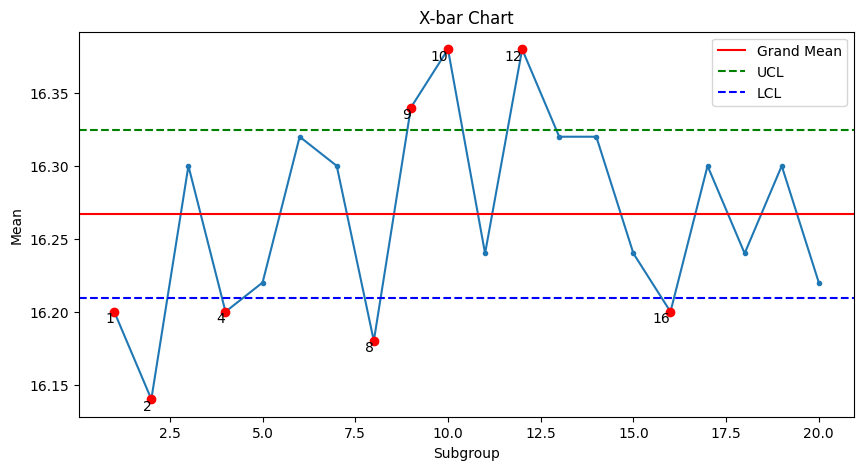

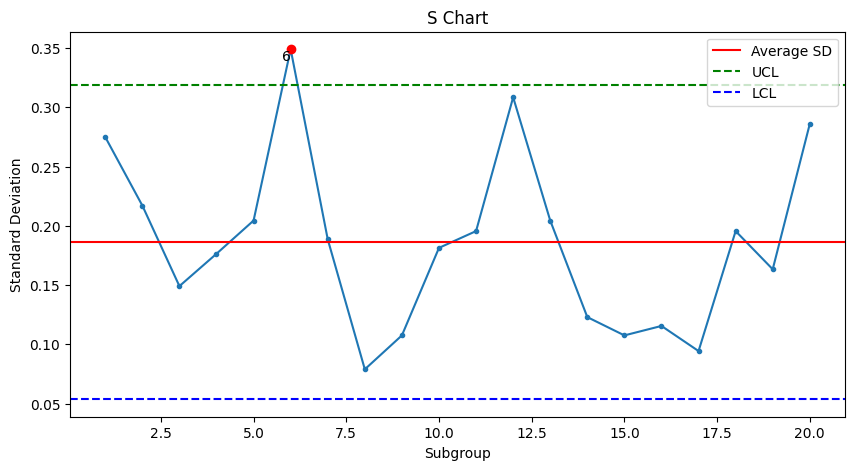

X-bar Chart Control Limits:
UCL_xbar: 16.32429237768396
LCL_xbar: 16.209707622316046
S Chart Control Limits:
UCL_s: 0.3183873831537162
LCL_s: 0.05364104336549183
Grand Mean: 16.267000000000003
Average SD: 0.18601421325960402


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Read the CSV file into a DataFrame
df_spcccs = pd.read_csv('SPCCCS.csv') # Reads a CSV file named 'SPCCCS.csv' and stores its contents in a pandas DataFrame called 'df_spcccs'.

# 2. Exclude the 'SUBROUP' column and keep only numeric data.
df_numeric = df_spcccs.drop(columns=['SUBROUP'])  # Creates a new DataFrame called 'df_numeric'

# 3. Calculate mean and standard deviation for each row (subgroup)
df_spcccs['MEAN'] = df_numeric.mean(axis=1)  # Calculates the mean of each row in df_numeric
df_spcccs['SD'] = df_numeric.std(axis=1)     # Calculate standard deviation for each row in df_numeric

# 4. Calculate the grand mean (average of all subgroup means) and average standard deviation
grand_mean = df_spcccs['MEAN'].mean()  # Calculates the average of the 'MEAN' column in the DataFrame
avg_sd = df_spcccs['SD'].mean()  # Calculates the average of the 'SD' column in the DataFrame

# 4. Define subgroup size and constants for control limits
n = 10  # Subgroup size
A2 = 0.308  # Constant for X-bar chart control limits (for n = 10)
c4 = 0.973  # Constant for S chart control limits (for n = 10)

# 5. Calculate control limits for X-bar chart (using new formula)
UCL_xbar = grand_mean + A2 * avg_sd
LCL_xbar = grand_mean - A2 * avg_sd

# Calculate control limits for S chart (using new formula)
UCL_s = avg_sd + 3 * (avg_sd / c4) * np.sqrt(1 - c4**2)
LCL_s = avg_sd - 3 * (avg_sd / c4) * np.sqrt(1 - c4**2)

# 6. Plot the X-bar chart
plt.figure(figsize=(10, 5)) # Set the figure size
plt.plot(df_spcccs['SUBROUP'], df_spcccs['MEAN'], marker='.', linestyle='-') # Plot the subgroup mean(s)
plt.axhline(y=grand_mean, color='r', linestyle='-', label='Grand Mean') # Add grand mean line
plt.axhline(y=UCL_xbar, color='g', linestyle='--', label='UCL')# Add UCL line (Upper control limit)
plt.axhline(y=LCL_xbar, color='b', linestyle='--', label='LCL') # Add LCL line (Lower control limit)

# Iterate over each mean and its index in the 'MEAN' column of the DataFrame.
for i, mean in enumerate(df_spcccs['MEAN']):
    # Check if the mean is outside the control limits.
    if mean > UCL_xbar or mean < LCL_xbar:
        # If outside the limits, plot the point as a red dot.
        plt.plot(df_spcccs['SUBROUP'][i], mean, 'ro') # 'ro' means red dot
        # Add a label to the point indicating the subgroup number.
        plt.text(df_spcccs['SUBROUP'][i], mean, str(df_spcccs['SUBROUP'][i]), fontsize=10, ha='right', va='top')

plt.xlabel('Subgroup') # Sets the label for the x-axis.
plt.ylabel('Mean') # Sets the label for the y-axis.
plt.title('X-bar Chart') # Sets the title of the plot.
plt.legend() # Displays the legend on the plot.
plt.show() # Shows the plot.

# 7. Plot the S chart
plt.figure(figsize=(10, 5)) # Set the figure size
plt.plot(df_spcccs['SUBROUP'], df_spcccs['SD'], marker='.', linestyle='-') # Plot df standard deviations
plt.axhline(y=avg_sd, color='r', linestyle='-', label='Average SD') # Add average SD line
plt.axhline(y=UCL_s, color='g', linestyle='--', label='UCL') # Add UCL line
plt.axhline(y=LCL_s, color='b', linestyle='--', label='LCL') # Add LCL line

# Iterate over each standard deviation and its index in the 'SD' column of the DataFrame.
for i, sd in enumerate(df_spcccs['SD']):
    # Check if the standard deviation is outside the control limits.
    if sd > UCL_s or sd < LCL_s:
        # If outside the limits, plot the point as a red dot.
        plt.plot(df_spcccs['SUBROUP'][i], sd, 'ro') # 'ro' means red dot
        # Add a label to the point indicating the subgroup number.
        plt.text(df_spcccs['SUBROUP'][i], sd, str(df_spcccs['SUBROUP'][i]), fontsize=10, ha='right', va='top')

plt.xlabel('Subgroup')
plt.ylabel('Standard Deviation')
plt.title('S Chart')
plt.legend()
plt.show()

# Print the control limits for X-bar chart and S chart.

print("X-bar Chart Control Limits:")
print("UCL_xbar:", UCL_xbar)
print("LCL_xbar:", LCL_xbar)

print("S Chart Control Limits:")
print("UCL_s:", UCL_s)
print("LCL_s:", LCL_s)

print("Grand Mean:", grand_mean)
print("Average SD:", avg_sd)